# This is a Classification Project Using Decision Tree & Random Forest algorithms for Loans Dataset

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Import and Inspect Data

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### EDA

In [31]:
df.drop({'credit.policy','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid'},axis=1).describe().round(1)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
count,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0
mean,0.1,319.1,10.9,12.6,710.8,4560.8,16914.0,46.8
std,0.0,207.1,0.6,6.9,38.0,2496.9,33756.2,29.0
min,0.1,15.7,7.5,0.0,612.0,179.0,0.0,0.0
25%,0.1,163.8,10.6,7.2,682.0,2820.0,3187.0,22.6
50%,0.1,269.0,10.9,12.7,707.0,4140.0,8596.0,46.3
75%,0.1,432.8,11.3,18.0,737.0,5730.0,18249.5,70.9
max,0.2,940.1,14.5,30.0,827.0,17640.0,1207359.0,119.0


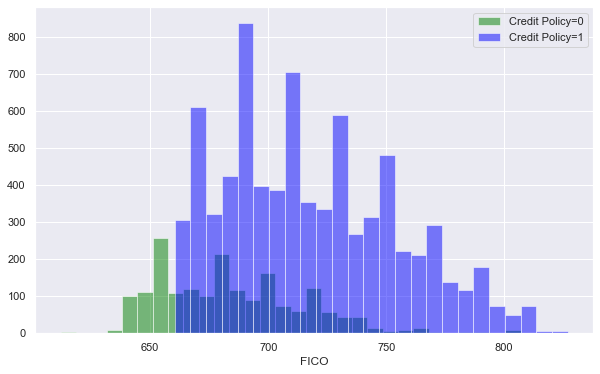

In [13]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==0]['fico'].hist(color='green',bins=30,label='Credit Policy=0',alpha=0.5)
df[df['credit.policy']==1]['fico'].hist(color='blue',bins=30,label='Credit Policy=1',alpha=0.5)
plt.xlabel('FICO')
plt.legend()
plt.show()

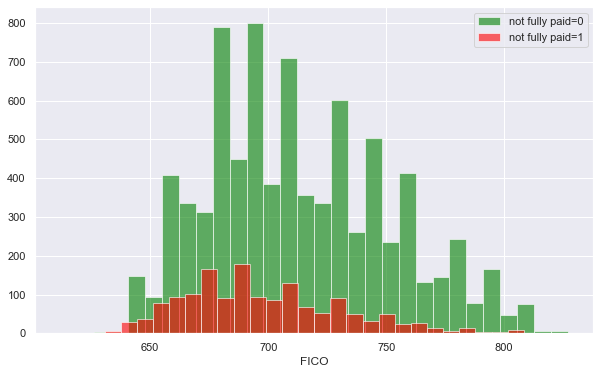

In [16]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==0]['fico'].hist(color='green',bins=30,label='not fully paid=0',alpha=0.6)
df[df['not.fully.paid']==1]['fico'].hist(color='red',bins=30,label='not fully paid=1',alpha=0.6)
plt.xlabel('FICO')
plt.legend()
plt.show()

<AxesSubplot: xlabel='purpose', ylabel='count'>

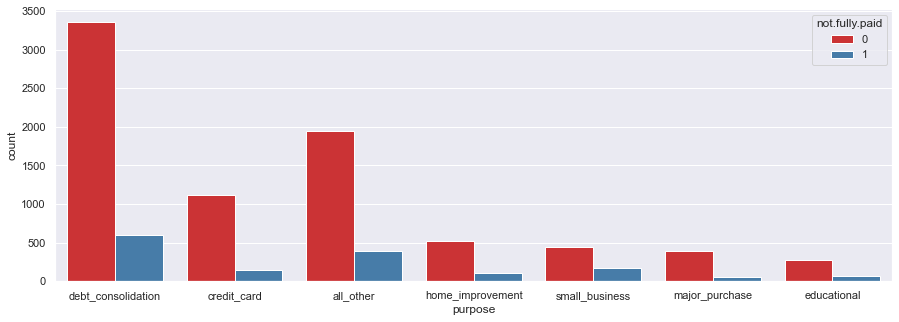

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='purpose',hue='not.fully.paid',palette='Set1')

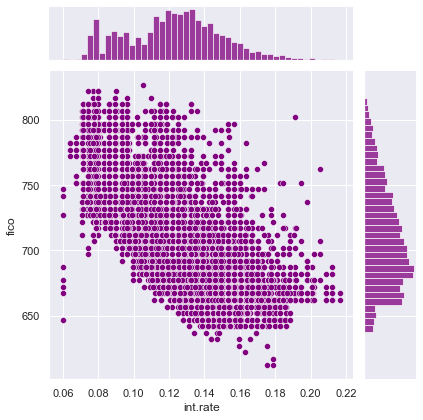

In [24]:
sns.jointplot(data=df,x='int.rate',y='fico',color='purple')

<Figure size 792x504 with 0 Axes>

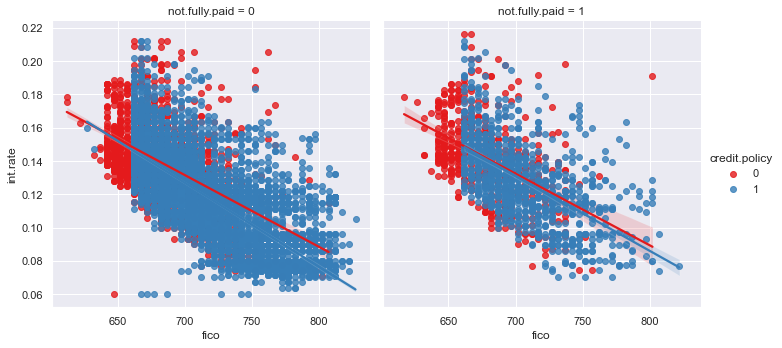

In [28]:
plt.figure(figsize=(11,7))
sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',palette='Set1')

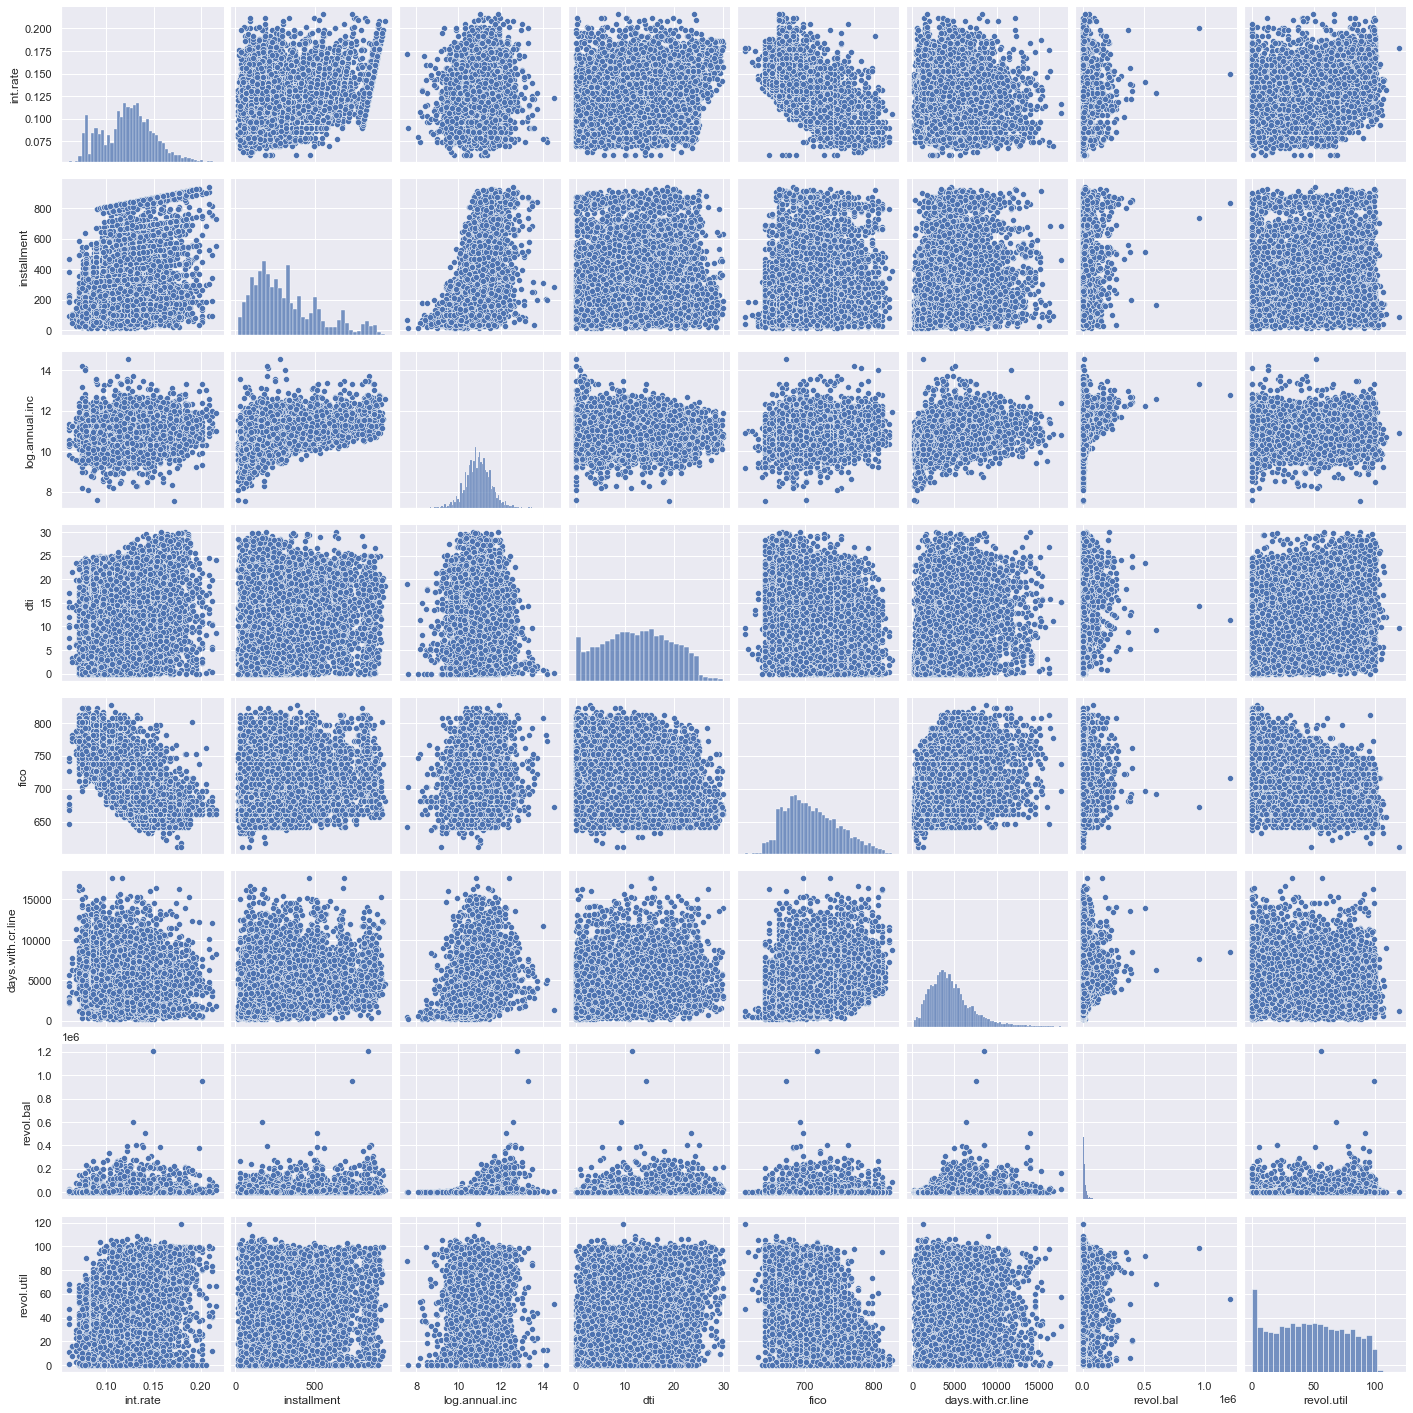

In [33]:
sns.pairplot(df.drop({'credit.policy','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid'},axis=1),palette='Set1')

<AxesSubplot: >

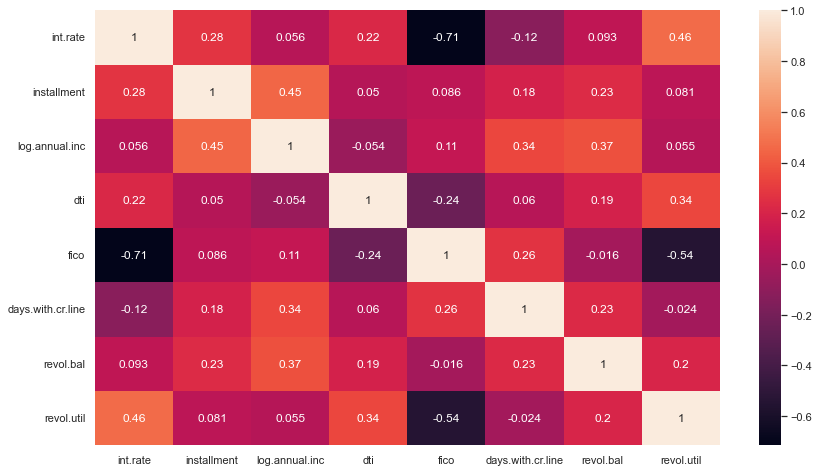

In [35]:
plt.figure(figsize=(14,8))
sns.heatmap(df.drop({'credit.policy','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid'},axis=1).corr(),annot=True)

## Build, Train and Evaluate The Model

- Data Preprocessing

In [38]:
cat_feats = pd.get_dummies(df['purpose'],drop_first=True)

In [44]:
df = pd.concat([df,cat_feats],axis=1)

In [47]:
df.drop('purpose',inplace=True,axis=1)

In [48]:
df.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0


In [51]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [52]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### DecisionTree algorithm

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
pred_dt = dt.predict(X_test)

In [56]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [57]:
print(confusion_matrix(y_test, pred_dt))

[[2014  417]
 [ 345   98]]


### RandomForest algorithm

In [58]:
rf = RandomForestClassifier(n_estimators=300)

In [62]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [63]:
pred_rf = rf.predict(X_test)

In [64]:
print(confusion_matrix(y_test, pred_rf))

[[2426    5]
 [ 432   11]]


In [65]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.69      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.77      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



# 